# CSE 482: Big Data Analysis (Spring 2019) Homework 3

Due date: Monday, March 18, 2019 (before midnight)

Submit your homework using the D2L system. Use the notebook below to write the solution of your homework. Make sure you submit the notebook along with its HTML version.

**1.** Consider the patient visit records shown in the table below:

| Visit ID | Symptoms 
|:--|:--:
| 1 | Fever, Cough, Headache, Diarrhea
| 2 | Fever, Headache
| 3 | Cough, Headache, Fatigue
| 4 | Cough, Diarrhea, Fatigue
| 5 | Fever, Headache, Diarrhea
| 6 | Fever, Cough, Diarrhea
| 7 | Cough, Fatigue
| 8 | Fever, Cough, Headache, Fatigue
| 9 | Fever, Cough, Headache
| 10 | Fever, Cough, Diarrhea, Fatigue

**a.** Assuming the minimum support threshold is 40%, list all the frequent 2-itemsets along with their support values. 

**Solution:** Use the template below to list each frequent 2-itemset and its support values. Replace {A,B} with the actual itemsets and X% with the actual support. Make sure you do not include the non-frequent itemsets.

In [26]:
#m2 minimum number of items to 2
#n2 maximum number of items to 2
#s40 support threshold 40%
#tr target type = rules
!./apriori -m2n2s40ts symptoms.data freq2.txt
!cat freq2.txt

./apriori - find frequent item sets with the apriori algorithm
version 6.27 (2017.08.01)        (c) 1996-2017   Christian Borgelt
reading symptoms.data ... [5 item(s), 10 transaction(s)] done [0.00s].
filtering, sorting and recoding items ... [5 item(s)] done [0.00s].
sorting and reducing transactions ... [10 transaction(s)] done [0.00s].
building transaction tree ... [17 node(s)] done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing freq2.txt ... [6 set(s)] done [0.00s].
Fatigue Cough (50)
Diarrhea Fever (40)
Diarrhea Cough (40)
Headache Fever (50)
Headache Cough (40)
Fever Cough (50)


| Frequent 2-Itemset | Support 
|:---------|:-:
| { Fatigue, Cough } |  50%
| { Diarrhea, Fever } |  40%
| { Diarrhea, Cough } | 40%
| { Headache, Fever } | 50%
| { Headache, Cough } | 40%
| { Fever, Cough } | 50%

**b.** Assuming the minimum support threshold is 40%, check whether there are any frequent 3-itemsets in the data. 

**Solution:**

In [28]:
#m2 minimum number of items to 2
#n2 maximum number of items to 2
#s40 support threshold 40%
#tr target type = rules
!./apriori -m3n3s40ts symptoms.data freq3.txt
!cat freq3.txt

./apriori - find frequent item sets with the apriori algorithm
version 6.27 (2017.08.01)        (c) 1996-2017   Christian Borgelt
reading symptoms.data ... [5 item(s), 10 transaction(s)] done [0.00s].
filtering, sorting and recoding items ... [5 item(s)] done [0.00s].
sorting and reducing transactions ... [9/10 transaction(s)] done [0.00s].
building transaction tree ... [14 node(s)] done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing freq3.txt ... [0 set(s)] done [0.00s].


| Frequent 3-Itemset | Support 
|:---------|:-:
| { A,B,C } |  X%
| { A,B,C } |  X%


**c.** Find all association rules from the data that satisfy the minimum support of 40% and minimum confidence of 80%.

**Solution:**

In [30]:
#s40 support threshold 40%
#c80 confidence threshold of 80%
#tr target type = rules
!./apriori -s40c80tr symptoms.data rules.txt
!cat rules.txt

./apriori - find frequent item sets with the apriori algorithm
version 6.27 (2017.08.01)        (c) 1996-2017   Christian Borgelt
reading symptoms.data ... [5 item(s), 10 transaction(s)] done [0.00s].
filtering, sorting and recoding items ... [5 item(s)] done [0.00s].
sorting and reducing transactions ... [10 transaction(s)] done [0.00s].
building transaction tree ... [17 node(s)] done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing rules.txt ... [5 rule(s)] done [0.00s].
Cough <- Fatigue (50, 100)
Fever <- Diarrhea (50, 80)
Cough <- Diarrhea (50, 80)
Fever <- Headache (60, 83.3333)
Cough <-  (100, 80)


| Association Rule | Support | Confidence 
|:---------|:--------|:-:
| Fatigue => Cough |  50% | 100%
| Diarrhea => Fever |  50% | 80%
| Diarrhea => Cough |  50% | 80%
| Headache => Fever |  60% | 83.3%
|  => Cough |  100% | 80%


**2.** Answer each of the following questions about properties of support and confidence measures.

   **a.** Suppose you're given the following support values:

| Itemset | Support 
|:---------|:-:
| { Bread } |  50%
| { Milk } |  30%
| { Bread, Milk} | 25%

  Which rule has higher confidence, {Bread} => {Milk} or {Milk} => {Bread}?

  **b.** Suppose the confidence of the rule {Butter} => {Bread} is 100%. Does it imply that the confidence of the rule {Bread} => {Butter} must also be 100%?

  **c.** If the support of the rule {Butter} => {Bread} is 30%, can the confidence of the rule be less than 30%?

**Solution:**

**a.** {Milk} => {Bread}
>0.25/0.5 = 0.5 {Bread} => {Milk}

>0.25/0.3 = 0.83 {Milk} => {Bread}


**b.** No, if bread has more transactions than butter than the confidence would be less than 100%




**c.** No, support has total # of transactions in the dinominator, while confidence has # of transactions that contain X, which must be less than or equal to total transactions, thus the confidecne is 30% or more

**3.** In this question, you will k-means clustering to the following set of two-dimensional data points: 

| x1 | x2 
|:---|:-:
| 1 |  1
| 1 |  2
| 2 |  2
| 3 |  2
| 4 |  1

Your goal is to apply kmeans clustering on the data to obtain two clusters, A and B. Assume the initial centroids of the clusters are as follows:

|      Centroid          | x1 | x2 
|:-----------------------|:---|:----
| Centroid for cluster A |  0 | 1
| Centroid for cluster B |  4 | 2

**a.** Calculate the distance between each data point to the two centroids using the Euclidean distance measure and fill in the following table:

**Solution:**

| Data point | distance to Centroid A | distance to Centroid B
|:-----------|:-----------------------|----------------------------------
| (1,1)      |                  | 
| (1,2)      |                  |
| (2,2)      |                  |
| (3,2)      |                  |
| (4,1)      |                  |


In [59]:
import pandas as pd

In [60]:
d = [(1,1),(1,2),(2,2),(3,2),(4,1)]
A = np.array([0,1])
B = np.array([4,2])

k = pd.DataFrame(columns = ['Data Point', 'distance to Centroid A', 'distance to Centroid B'])
k['Data Point'] = d

k['distance to Centroid A'] = k.apply(lambda x : np.linalg.norm(np.array(x['Data Point'])-A), axis =1)
k['distance to Centroid B'] = k.apply(lambda x : np.linalg.norm(np.array(x['Data Point'])-B), axis =1)

k

,Data Point,distance to Centroid A,distance to Centroid B
0,"(1, 1)",1.000000,3.162278
1,"(1, 2)",1.414214,3.000000
2,"(2, 2)",2.236068,2.000000
3,"(3, 2)",3.162278,1.000000
4,"(4, 1)",4.000000,1.000000


**b.** Based on the distance values calculated above, assign each data point to its corresponding cluster. Show the cluster assignment in the table below.

**Solution:**

| Data point | Cluster Assignment (A or B) 
|:-----------|:---------------------------
| (1,1)      | A
| (1,2)      | A
| (2,2)      | B
| (3,2)      | B
| (4,1)      | B

**c.** Based on the cluster assignment given in part (b) above, re-compute the centroids of the two clusters.

**Solution:**

| Centroids              |  x1 | x2 
|:-----------------------|:----|:----
| Centroid for cluster A |  1  | 1.5
| Centroid for cluster B |  3  | 1.67

In [65]:
(np.array([1,1])+np.array([1,2]))/2

array([1. , 1.5])

In [66]:
(np.array([2,2])+np.array([3,2])+np.array([4,1]))/3

array([3.        , 1.66666667])

**d.** Based on the new centroids in part (c), re-compute the distance between each data point to the two centroids using the Euclidean distance measure and fill in the following table:

**Solution:**

| Data point | distance to Centroid A | distance to Centroid B
|:-----------|:-----------------------|----------------------------------
| (1,1)      |                  | 
| (1,2)      |                  |
| (2,2)      |                  |
| (3,2)      |                  |
| (4,1)      |                  |


In [67]:
d = [(1,1),(1,2),(2,2),(3,2),(4,1)]
A = np.array([1,1.5])
B = np.array([3,1.667])

k = pd.DataFrame(columns = ['Data Point', 'distance to Centroid A', 'distance to Centroid B'])
k['Data Point'] = d

k['distance to Centroid A'] = k.apply(lambda x : np.linalg.norm(np.array(x['Data Point'])-A), axis =1)
k['distance to Centroid B'] = k.apply(lambda x : np.linalg.norm(np.array(x['Data Point'])-B), axis =1)

k

,Data Point,distance to Centroid A,distance to Centroid B
0,"(1, 1)",0.500000,2.108291
1,"(1, 2)",0.500000,2.027533
2,"(2, 2)",1.118034,1.053987
3,"(3, 2)",2.061553,0.333000
4,"(4, 1)",3.041381,1.202035


**e.** Based on the distance values calculated in part (d) above, assign each data point to its corresponding cluster. Show the cluster assignment in the table below.

**Solution:**

| Data point | Cluster Assignment (A or B) 
|:-----------|:---------------------------
| (1,1)      |   A
| (1,2)      |   A
| (2,2)      |   B
| (3,2)      |   B
| (4,1)      |   B

**f.** Compute the sum-of-square errors (SSE) of the k-means clustering solution above.

**Solution:**

SSE = 3.167

In [81]:
def sse(point,cluster):
    s = 0
    for p,c in zip(point,cluster):
        s += (p-c)**2
    return s
        
d = [(1,1),(1,2),(2,2),(3,2),(4,1)]
A = (1,1.5)
B = (3,1.667)
c = [A,A,B,B,B]
s = 0

for i in range(len(d)):
    s += sse(d[i],c[i])
s

3.1666670000000003

**4.** Consider the following distance function between 4 data points (A, B, C, and D).

| Distances  | A     | B     | C     | D
|:-----------|:------|:------|:------|:--
| A          | 0     | 5.000 | 3.606 | 4.243
| B          | 5.000 | 0     | 7.071 | 6.083   
| C          | 3.606 | 7.071 | 0     | 7.810  
| D          | 4.243 | 6.083 | 7.810 | 0   

Use the distance matrix shown in the table below to perform MIN (single-link) and MAX (complete link) hierarchical clustering. Show your results by drawing a dendrogram. The dendrogram should clearly show the order in which the points are merged and the y-axis show the distance between pairs of clusters being merged at each iteration.

**Solution:** Save your image as jpg/png files and attach it below. Make sure you upload the image files as well.

Solution for MIN:

<img src="MIN.png">

Solution for MAX:

<img src="MAX.png">

# MIN

AC 3.606

| Distances  | AC    | B     | D
|:-----------|:------|:------|:-----
| AC         | 0     | 5.000 | 4.243
| B          | 5.000 | 0     | 6.083   
| D          | 4.243 | 6.083 | 0 

ACD 4.243

| Distances  | ACD   | B     
|:-----------|:------|:------
| ACD        | 0     | 5.000 
| B          | 5.000 | 0      


ACDB 5.000

# MAX

AC 3.606

| Distances  | AC    | B     | D
|:-----------|:------|:------|:-----
| AC         | 0     | 7.071 | 7.810
| B          | 7.071 | 0     | 6.083   
| D          | 7.810 | 6.083 | 0 

BD 6.083

| Distances  | AC    | BD     
|:-----------|:------|:------
| AC         | 0     | 7.810
| BD         | 7.810 | 0      


ACBD 7.810

---
**5.** For this question, you will apply a hierarchical clustering approach to detect outliers in data.  

**a.** Download the dataset named stocks.csv from the class website. Use pandas to load the data into a DataFrame object named data. Remove the column named "Date" from data. Display the first 5 rows of data.

**Solution:**

In [94]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,998,999,1000,1001,1002,1003,1004,1005,1006,1007
IBM,196.350006,195.270004,193.990005,193.139999,192.869995,192.320007,192.880005,194.449997,192.619995,192.500000,...,166.729996,166.679993,167.600006,167.330002,167.059998,166.710007,167.139999,166.190002,166.600006,165.990005
AAPL,549.029976,542.099991,526.999992,523.900002,525.310020,517.100006,523.509979,520.300026,501.750015,485.920013,...,115.970001,116.639999,116.949997,117.059998,116.290001,116.519997,117.260002,116.760002,116.730003,115.820000
GOOG,723.251230,723.671256,737.971262,734.751286,733.301227,738.121237,741.481263,739.991260,723.251230,724.931273,...,790.799988,794.200012,796.419983,794.559998,791.260010,789.909973,791.549988,785.049988,782.789978,771.820007
MSFT,27.620001,27.250000,26.740000,26.690001,26.549999,26.700001,26.459999,26.830000,26.889999,27.209999,...,62.299999,63.619999,63.540001,63.540001,63.549999,63.240002,63.279999,62.990002,62.900002,62.139999
INTC,21.379999,21.320000,21.160000,21.250000,21.090000,21.450001,21.799999,22.000000,22.000000,21.879999,...,36.310001,36.889999,37.209999,36.980000,36.930000,36.970001,37.070000,36.630001,36.660000,36.270000
FB,28.000000,27.770000,28.760000,29.420000,29.059999,30.590000,31.299999,31.719999,30.950001,30.100000,...,119.870003,119.239998,119.089996,119.040001,117.400002,117.269997,118.010002,116.919998,116.349998,115.050003
AMZN,257.309998,258.480011,259.149994,268.459991,266.380005,266.350006,265.339996,267.940002,272.730011,271.899994,...,757.770020,766.000000,771.219971,770.599976,766.340027,760.590027,771.400024,772.130005,765.150024,749.869995
C,41.250000,41.389999,42.430000,42.470001,42.459999,42.040001,42.830002,42.340000,42.220001,42.570000,...,59.750000,59.660000,60.799999,60.750000,60.490002,60.990002,61.090000,60.040001,59.380001,59.430000


In [82]:
import pandas as pd

data = pd.read_csv("stocks.csv")    # load the csv file
data = data.drop('Date', axis =1)    # remove the Date column

data.head()

,IBM,AAPL,GOOG,MSFT,INTC,FB,AMZN,C
0,196.350006,549.029976,723.251230,27.620001,21.379999,28.000000,257.309998,41.250000
1,195.270004,542.099991,723.671256,27.250000,21.320000,27.770000,258.480011,41.389999
2,193.990005,526.999992,737.971262,26.740000,21.160000,28.760000,259.149994,42.430000
3,193.139999,523.900002,734.751286,26.690001,21.250000,29.420000,268.459991,42.470001
4,192.869995,525.310020,733.301227,26.549999,21.090000,29.059999,266.380005,42.459999


**b.** Compute the correlation between every pair of stocks and display the correlation values.

**Solution:**

In [83]:
corr = data.corr()    # compute correlation
corr          # display the correlation values

,IBM,AAPL,GOOG,MSFT,INTC,FB,AMZN,C
IBM,1.000000,0.694522,0.262351,-0.762699,-0.624763,-0.820702,-0.710095,0.004437
AAPL,0.694522,1.000000,0.611631,-0.767879,-0.845940,-0.761233,-0.569849,-0.138674
GOOG,0.262351,0.611631,1.000000,-0.298800,-0.533491,-0.270900,0.004895,-0.109873
MSFT,-0.762699,-0.767879,-0.298800,1.000000,0.871878,0.946790,0.857449,0.148733
INTC,-0.624763,-0.845940,-0.533491,0.871878,1.000000,0.803406,0.600057,0.278196
FB,-0.820702,-0.761233,-0.270900,0.946790,0.803406,1.000000,0.899568,0.039110
AMZN,-0.710095,-0.569849,0.004895,0.857449,0.600057,0.899568,1.000000,-0.025910
C,0.004437,-0.138674,-0.109873,0.148733,0.278196,0.039110,-0.025910,1.000000


**c.** Apply single-link hierarchical clustering with correlation as evaluation metric. Draw the resulting dendrogram. Based on the dendrogram, which stock is an outlier?

**Solution:**

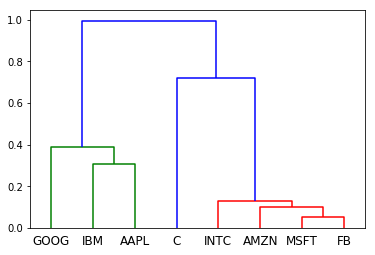

In [98]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage( data.T, method= 'single' , metric= 'correlation')
dn = hierarchy.dendrogram(Z,labels=data.columns.tolist(), orientation='top')

**d.** Based on the dendrogram obtained in part (c), which stock is likely to be an outlier? Explain your reason clearly.

**Solution:**

C, it was last to be clustered into a group, meaning it is most different than all the other stock.


---

**6.** Consider the following user ratings data for a streaming music app (where each row is a user and each column is an artist).

| User  | Mozart | Beethoven | Ed Sheeran | Taylor Swift
| :-- | :-- | :-- | :-- | :--
| 1 | 2 | 2 | 4 | 5 
| 2 | 1 | 2 | 5 | 4 
| 3 | 1 | 1 | 4 | 4 
| 4 | 4 | 4 | 2 | 3 
| 5 | 5 | 4 | 2 | 1 
| 6 | ? | 5 | 1 | 1  

Our goal is to predict whether user 6 likes Mozart.

**a.** You will use the baseline model to compute the rating of user 6 for Mozart. Assume the weight of the items, $w_i$, are initialized to 0s and the hyperparameters $\lambda_1$ and $\lambda_2$, are also zero. Iteratively compute the user weights, $w_u$, and item weights, $w_i$, for 4 iterations. You should also compute the global mean, $\mu$.

**Solution:**

In [232]:
d = np.array([[5,3,4,0],[5,4,5,5],[2,2,4,5],[3,1,1,2]])
mu = d.sum()/(d.size-1)
s = d.shape
print(mu)

wu = np.array([0,0,0,0])
wi = np.array([0,0,0,0])

for i in range(1):
    t = (d - (wi*np.ones((s[0],1))) - mu)
    t[0,s[0]-1] = 0
    wu = np.matmul(t,np.ones((s[0],1))).T[0]*np.array([1/(s[0]-1),1/s[0],1/s[0],1/s[0]])
    t = (d - (wu*np.ones((s[0],1))).T - mu)
    t[0,s[0]-1] = 0
    wi = np.matmul(np.ones((1,s[0])),t)[0]*np.array([1/s[0],1/s[0],1/s[0],1/(s[0]-1)])

    
print(wu)
print(wi)    
    

3.4
[ 0.6   1.35 -0.15 -1.65]
[ 0.3125 -0.9375  0.0625  0.75  ]


In [273]:
d = np.array([[5,3,4,0],[5,4,5,5],[2,2,4,5],[3,1,1,2]])
d = np.array([[2,2,4,5],[1,2,5,4],[1,1,4,4],[4,4,2,3],[5,4,2,1],[0,5,1,1]])
missing = (5,0)
#missing = (0,3)
mu = d.sum()/(d.size-1)
s = d.shape
print(mu)

wudf = pd.DataFrame(columns=['User','Iteration 1','Iteration 2','Iteration 3','Iteration 4'])
wudf['User'] = [1,2,3,4,5,6]
wudf

widf = pd.DataFrame(columns=['User','Iteration 1','Iteration 2','Iteration 3','Iteration 4'])
widf['User'] = ['Mozart','Beethoven','Ed Sheeran','Taylor Swift']
widf

wu = np.array([0,0,0,0])
wi = np.array([0,0,0,0])

for i in range(4):
    t = (d - (wi*np.ones((s[0],1))) - mu)
    t[missing[0],missing[1]] = 0
    m = 1/s[0]*np.ones((s[0]))
    m[missing[0]] = 1/(s[0]-1)
    wu = np.matmul(t,np.ones((s[1],1))).T[0]*m
    
    t = (d - (wu*np.ones((s[1],1))).T - mu)
    t[missing[0],missing[1]] = 0
    m = 1/s[0]*np.ones((s[1]))
    m[missing[1]] = 1/(s[1]-1)
    wi = np.matmul(np.ones((1,s[0])),t)[0]*m

    wudf.iloc[:,i+1] = wu
    widf.iloc[:,i+1] = wi

    
print(wu)
print(wi)  

2.9130434782608696
[ 0.3374252   0.17075853 -0.1625748   0.3374252   0.17075853 -0.36546609]
[-0.80633669  0.00556876  0.00556876  0.00556876]


The user weights, $w_u$ after 4 iterations are shown below (fill in the table below for the weight of each user):

| User | Iteration 1 | Iteration 2 | Iteration 3 | Iteration 4
| :-- | :-- | :-- | :-- | :-- 
| 1 |   |  |   |   
| 2 |   |  |   |   
| 3 |   |  |   |   
| 4 |   |  |   |   
| 5 |   |  |   |   
| 6 |   |  |   |    

The item weights, $w_i$ after 4 iterations are shown below (fill in the table below for the weight of each item):

| Item | Iteration 1 | Iteration 2 | Iteration 3 | Iteration 4
| :----- | :-- | :-- | :-- | :-- 
| Mozart       |   |   |   |   
| Beethoven    |   |   |   |   
| Ed Sheeran   |   |   |   |   
| Taylor Swift |   |   |   |   


The global mean $\mu$ is 2.9130434782608696

In [274]:
wudf

,User,Iteration 1,Iteration 2,Iteration 3,Iteration 4
0,1,0.224638,0.279388,0.312578,0.337425
1,2,0.057971,0.112721,0.145912,0.170759
2,3,-0.275362,-0.220612,-0.187422,-0.162575
3,4,0.224638,0.279388,0.312578,0.337425
4,5,0.057971,0.112721,0.145912,0.170759
5,6,-0.347826,-0.405797,-0.384219,-0.365466


In [275]:
widf

,User,Iteration 1,Iteration 2,Iteration 3,Iteration 4
0,Mozart,-0.618357,-0.709608,-0.764925,-0.806337
1,Beethoven,0.096618,0.060655,0.029400,0.005569
2,Ed Sheeran,0.096618,0.060655,0.029400,0.005569
3,Taylor Swift,0.096618,0.060655,0.029400,0.005569


**b.** Based on the model parameters estimated in part (a), predict user 6's rating for Mozart.

**Solution:**

In [276]:
-0.36546609 + -0.806337 + 2.9130434782608696

1.7412403882608696

**c.** Calculate a similarity matrix between the artists (ignoring the ratings given by user 6). Use cosine as your similarity measure. 

**Solution:**

In [281]:
def cosSim(a,b):
    c = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return c

In [278]:
d = np.array([[2,2,4,5],[1,2,5,4],[1,1,4,4],[4,4,2,3],[5,4,2,1]]).T
d

array([[2, 1, 1, 4, 5],
       [2, 2, 1, 4, 4],
       [4, 5, 4, 2, 2],
       [5, 4, 4, 3, 1]])

In [286]:
sim = pd.DataFrame(columns = ['Similarity','Mozart','Beethoven','Ed Sheeran','Taylor Swift'])
sim['Similarity'] = ['Mozart','Beethoven','Ed Sheeran','Taylor Swift']
sim
for i in range(4):
    l = [0,0,0,0]
    for j in range(4):
        l[j] = cosSim(d[i,:],d[j,:])
    sim.iloc[:,i+1] = l

sim
        

,Similarity,Mozart,Beethoven,Ed Sheeran,Taylor Swift
0,Mozart,1.000000,0.979552,0.633231,0.623709
1,Beethoven,0.979552,1.000000,0.736097,0.725027
2,Ed Sheeran,0.633231,0.736097,1.000000,0.969808
3,Taylor Swift,0.623709,0.725027,0.969808,1.000000


| Similarity | Mozart | Beethoven | Ed Sheeran | Taylor Swift
| :----- | :-- | :-- | :-- | :-- 
| Mozart       |   |   |   |   
| Beethoven    |   |   |   |   
| Ed Sheeran   |   |   |   |   
| Taylor Swift |   |   |   |   


**d.** Predict the rating of user 6 for Mozart using the item-based nearest neighbor approach.

**Solution:**